# Step 1. Get the data

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [28]:
# path to save the processed data
x_train_path: str = '../data/processed/x_train.csv'
x_test_path: str = '../data/processed/x_test.csv'

y_train_path: str = '../data/processed/y_train.csv'
y_test_path: str = '../data/processed/y_test.csv'

# save the processed data to their corresponding files
X_train = pd.read_csv(filepath_or_buffer=x_train_path, sep=',')
X_test = pd.read_csv(filepath_or_buffer=x_test_path, sep=',')

y_train = pd.read_csv(filepath_or_buffer=y_train_path, sep=',')
y_test = pd.read_csv(filepath_or_buffer=y_test_path, sep=',')

In [29]:
# verify x_train
X_train.head()

,contact,month,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,0.0,2.0,-0.393519,0.0,0.0,0.0,0.09375,0.183896,0.028477,0.287597
1,1.0,0.0,-0.291667,0.0,0.0,0.0,-0.90625,-0.931447,-0.998894,-0.712403
2,1.0,0.0,-0.768519,0.0,1.0,1.0,-0.90625,-0.931447,-0.968482,-0.712403
3,1.0,2.0,-0.393519,0.0,0.0,0.0,0.09375,0.183896,0.028753,0.287597
4,0.0,0.0,0.763889,0.0,0.0,0.0,0.00000,0.266594,0.000829,0.000000


In [30]:
# verify x_test
X_test.head()

,contact,month,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,1.0,0.0,0.859729,0.0,1.0,1.0,-0.90625,-0.931447,-0.983688,-0.712403
1,0.0,0.0,0.470588,0.0,0.0,0.0,0.00000,0.266594,0.000829,0.000000
2,1.0,0.0,-0.583710,0.0,1.0,1.0,-0.90625,-0.931447,-0.979818,-0.712403
3,0.0,1.0,0.787330,0.0,0.0,0.0,0.09375,0.779108,0.030412,0.287597
4,1.0,2.0,0.036199,0.0,0.0,0.0,0.09375,0.183896,0.029306,0.287597


In [31]:
# verify y_train
y_train.head()

,y
0,0
1,0
2,0
3,0
4,0


In [32]:
# verify y_test
y_test.head()

,y
0,0
1,0
2,0
3,0
4,0


# Option 1. Model without any optimization

## Step 1: Initialization and training of the model

In [33]:
from sklearn.linear_model import LogisticRegression

# model with max iteration 1000, without 1000 the model give the error ConvergenceWarning
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

## Step 2: Model prediction

In [34]:
# make the prediction
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [35]:
# make the prediction of the probabilities of being one class or another
y_prob = model.predict_proba(X_test)

## Step 3: Metrics

Lets print the full report of the model

In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            log_loss, classification_report)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob[:, 1])
confusion = confusion_matrix(y_test, y_pred)
logloss = log_loss(y_test, y_prob)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC-ROC: {auc_roc}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Log Loss: {logloss}')
print(f'Classification Report:\n{report}')

Accuracy: 0.906409322651129
Precision: 0.6512915129151291
Recall: 0.3775401069518717
F1-Score: 0.4779959377115775
AUC-ROC: 0.928905929070245
Confusion Matrix:
[[7114  189]
 [ 582  353]]
Log Loss: 0.21646551977381726
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7303
           1       0.65      0.38      0.48       935

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.71      8238
weighted avg       0.89      0.91      0.90      8238



With this metric we can tell that our model (in theory) will predict correctly approximately 90% of times. And we can see that we have better metrics for the label 0 (no) because on the data analysis we could see that the data is bias to the **no** label.

Now lets do the confusion matrix using seaborn

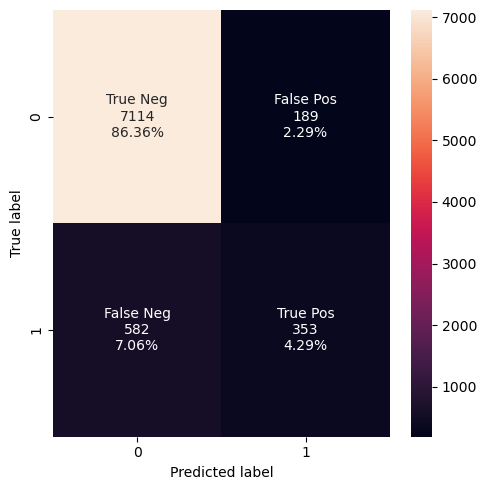

In [47]:
# create the groups to display
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in confusion.flatten()] # type: ignore
group_percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)] # type: ignore
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
categories = ['No', 'Yes']
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(5, 5))

sns.heatmap(confusion, annot=labels,  fmt='')

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()

The interpretation of a confusion matrix is as follows:

- **True positive (TP)**: corresponds to the number 353 and are the cases where the model predicted positive (takes a long-term deposit) and the actual class is also positive.
- **True negative (TN)**: Corresponds to the number 7114 and are the cases where the model predicted negative (do not take a long-term deposit) and the actual class is also negative.
- **False positive (FP)**: Corresponds to the number 189 and are the cases in which the model predicted positive, but the actual class is negative.
- **False negative (FN)**: Corresponds to the number 582 and are the cases where the model predicted negative, but the actual class is positive.

# Option 2. Model with optimization

In [68]:
# create another model
opt_model = LogisticRegression(random_state=42)

## Step 1: Create the hyper parameter optimization model

In [69]:
from sklearn.model_selection import GridSearchCV

# define the parameters that we want to adjust by hand
hyperparams = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'l1_ratio': [0.25, 0.5, 0.75],
}

# initialize the grid
grid = GridSearchCV(opt_model, hyperparams, scoring = 'accuracy', cv = 5, n_jobs=-1, verbose=1)

## Step 2: Fit the model

In [70]:
grid.fit(X_train, y_train.values.ravel())

print(f"Best hyperparameters: {grid.best_params_}")

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
Best hyperparameters: {'C': 100, 'l1_ratio': 0.25, 'penalty': 'l2', 'solver': 'newton-cg'}


## Step 3: Get the best model and predict

In [71]:
# get the best parameters and model
best_params = grid.best_params_
best_model: LogisticRegression = grid.best_estimator_

In [72]:
# predict the values
y_pred = best_model.predict(X_test)

In [73]:
# make the prediction of the probabilities of being one class or another
y_prob = best_model.predict_proba(X_test)

## Step 4: Metrics of the model

In [75]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            log_loss, classification_report)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob[:, 1])
confusion = confusion_matrix(y_test, y_pred)
logloss = log_loss(y_test, y_prob)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC-ROC: {auc_roc}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Log Loss: {logloss}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9067734887108522
Precision: 0.6543438077634011
Recall: 0.3786096256684492
F1-Score: 0.4796747967479675
AUC-ROC: 0.9288015107702423
Confusion Matrix:
[[7116  187]
 [ 581  354]]
Log Loss: 0.2165771978773384
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7303
           1       0.65      0.38      0.48       935

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.71      8238
weighted avg       0.89      0.91      0.90      8238



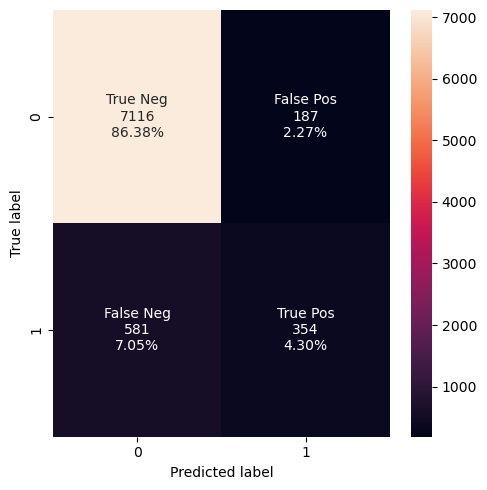

In [76]:
# create the groups to display
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in confusion.flatten()] # type: ignore
group_percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)] # type: ignore
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
categories = ['No', 'Yes']
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(5, 5))

sns.heatmap(confusion, annot=labels,  fmt='')

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()

The interpretation of a confusion matrix is as follows:

- **True positive (TP)**: corresponds to the number 354 and are the cases where the model predicted positive (takes a long-term deposit) and the actual class is also positive. **(one more this time)**
- **True negative (TN)**: Corresponds to the number 7116 and are the cases where the model predicted negative (do not take a long-term deposit) and the actual class is also negative. **(two more this time)**
- **False positive (FP)**: Corresponds to the number 187 and are the cases in which the model predicted positive, but the actual class is negative. **(two less this time)**
- **False negative (FN)**: Corresponds to the number 581 and are the cases where the model predicted negative, but the actual class is positive. **(one less this time)**

We can see that we obtained almost the same results, some higher decimals in the accuracy but all the values are mostly the same. The bigger change can be seen in the confusion matrix where we can see that we classified a little bit better this time. We can get the conclusion that this is the best results we might get at this moment, different analysis in the data and scaling could be done to get better results.